In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('./data06_iris2.csv')
X = df.iloc[:,:-1]
Y = df['Species']

In [10]:
from sklearn.model_selection import train_test_split # 시간 흐름이라는 정보가 있으면 순서대로 나누지만, 해당 자료는 시간 의미가 없음
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.4,random_state=1) 

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


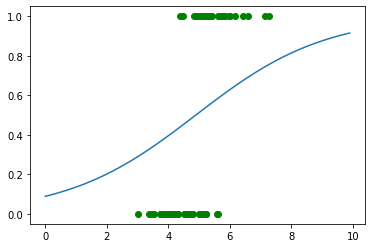

In [11]:
###########################################################
# logistic regression
###########################################################

from sklearn.linear_model import LogisticRegression

# simple logistic regression
f = LogisticRegression()
f.fit(xtrain[['Petal.Length']],ytrain)
f.coef_
f.intercept_
x = np.arange(0,10,step=0.1)
x = x.reshape((len(x),1))
yhat_prob = f.predict_proba(x) # 예측 확률
yhat = f.predict(x) # 예측확률을 판별 기준값을 가지고 클래스를 예측한 것

plt.plot(xtrain[['Petal.Length']],ytrain,'go')
plt.plot(x[:,0],yhat_prob[:,1])
plt.show()

In [12]:
f = LogisticRegression()
f.fit(xtrain,ytrain)
yhat_train = f.predict(xtrain)
yhat_train_prob = f.predict_proba(xtrain)
yhat_test = f.predict(xtest)
yhat_test_prob = f.predict_proba(xtest)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.675

In [13]:
pd.crosstab(yhat_train,ytrain)

col_0,0,1
Species,,
0,27,5
1,6,22


In [14]:
pd.crosstab(yhat_test,ytest)

col_0,0,1
Species,,
0,9,9
1,4,18


In [15]:
print(f.score(xtrain,ytrain)) # train_accuracy 49/60
print(f.score(xtest,ytest)) # test_accuracy 27/40

0.8166666666666667
0.675


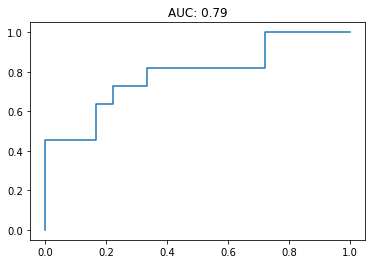

In [16]:
# roc curve
from sklearn.metrics import roc_curve, roc_auc_score
fpr,tpr,th = roc_curve(ytest,yhat_test_prob[:,1])

auc = roc_auc_score(ytest,yhat_test_prob[:,1])

plt.plot(fpr,tpr)
plt.title('AUC: %.2f' % auc)
plt.show()

In [17]:
###########################################################
# logistic regression with StatsModels
###########################################################

import statsmodels.api as sm
X = xtrain[['Petal.Length']]
X = sm.add_constant(X)
y = ytrain
f = sm.Logit(y,X)
r = f.fit()
r.summary()

Optimization terminated successfully.
         Current function value: 0.390325
         Iterations 7


C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Species   No. Observations:                   60
Model:                          Logit   Df Residuals:                       58
Method:                           MLE   Df Model:                            1
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:                  0.4351
Time:                        14:43:15   Log-Likelihood:                -23.419
converged:                       True   LL-Null:                       -41.455
Covariance Type:            nonrobust   LLR p-value:                 1.902e-09
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -16.1314      4.263     -3.784      0.000     -24.487      -7.776
Petal.Length     3.2172      0.849      3.788      0.000       1.553       4.882
================================================================================
"""

In [18]:
# using a full model
X = xtrain
X = sm.add_constant(X)
y = ytrain
f = sm.Logit(y,X)
r = f.fit()
r.summary()

Optimization terminated successfully.
         Current function value: 0.229656
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Species   No. Observations:                   60
Model:                          Logit   Df Residuals:                       55
Method:                           MLE   Df Model:                            4
Date:                Tue, 30 Jul 2019   Pseudo R-squ.:                  0.6676
Time:                        14:43:23   Log-Likelihood:                -13.779
converged:                       True   LL-Null:                       -41.455
Covariance Type:            nonrobust   LLR p-value:                 2.741e-11
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -22.8469      8.729     -2.617      0.009     -39.956      -5.738
Sepal.Length     0.7136      0.842      0.848      0.396      -0.936       2.363
Sepal.Width     -2.2656      1.075     -2.107      0.035      -4.373      -0.158
Petal.Length     4.0423      1.389      2.911      0.004       1.320       6.764
Petal.Width      2.8650      1.106      2.591      0.010       0.698       5.032
================================================================================
"""

In [19]:
# training set
yhat_train_prob = r.predict(X)
yhat_train = (yhat_train_prob>0.5).astype(int)
pd.crosstab(yhat_train,ytrain)

Species,0,1
row_0,,
0,30,4
1,2,24


In [20]:
# test set
yhat_test_prob = r.predict(sm.add_constant(xtest))
yhat_test = (yhat_test_prob>0.5).astype(int)
pd.crosstab(yhat_test,ytest)

Species,0,1
row_0,,
0,15,7
1,3,15


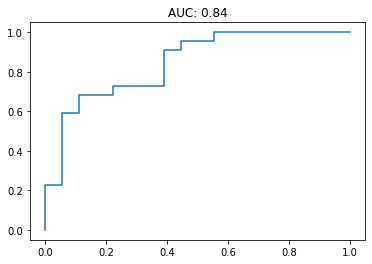

In [21]:
# roc curve
from sklearn.metrics import roc_curve, roc_auc_score

fpr,tpr,th = roc_curve(ytest,yhat_test_prob)
auc = roc_auc_score(ytest,yhat_test_prob)

plt.plot(fpr,tpr)
plt.title('AUC: %.2f' % auc)
plt.show()

In [22]:
###########################################################
# linear discriminant analysis
###########################################################

# linear discriminant analysis: 2D
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# full model
f = LinearDiscriminantAnalysis()
f.fit(xtrain,ytrain)
yhat_train = f.predict(xtrain)
yhat_train_prob = f.predict_proba(xtrain)
yhat_test = f.predict(xtest)
yhat_test_prob = f.predict_proba(xtest)
f.score(xtrain,ytrain)
f.score(xtest,ytest)

0.75

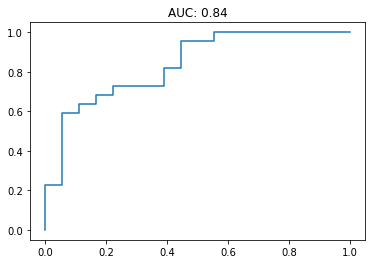

In [23]:
# roc
fpr,tpr,th = roc_curve(ytest,yhat_test_prob[:,1])
auc = roc_auc_score(ytest,yhat_test_prob[:,1])
plt.plot(fpr,tpr)
plt.title('AUC: %.2f' % auc)
plt.show()

In [24]:
# quadratic discriminant analysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

f = QuadraticDiscriminantAnalysis()
f.fit(xtrain,ytrain)
yhat_test = f.predict(xtest)
yhat_test_prob = f.predict_proba(xtest)
f.score(xtrain,ytrain)
f.score(xtest,ytest)

0.75

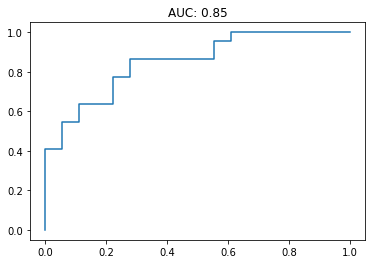

In [25]:
# roc
fpr,tpr,th = roc_curve(ytest,yhat_test_prob[:,1])
auc = roc_auc_score(ytest,yhat_test_prob[:,1])
plt.plot(fpr,tpr)
plt.title('AUC: %.2f' % auc)
plt.show()


C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8166666666666667 0.675
0.9166666666666666 0.75
0.9166666666666666 0.75


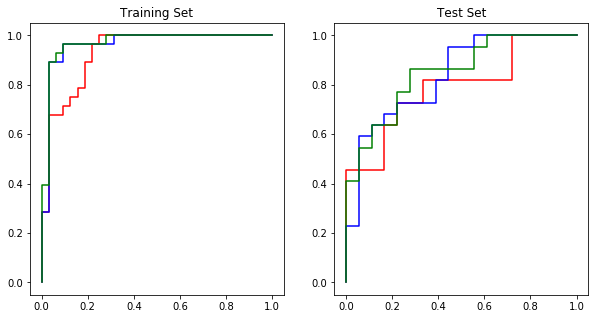

In [26]:
###########################################################
# all at once
###########################################################

classifier_names = ['logistic','lda','qda']
classifiers = [
        LogisticRegression(),
        LinearDiscriminantAnalysis(),
        QuadraticDiscriminantAnalysis()]

for i in range(len(classifiers)):
    f = classifiers[i]
    f.fit(xtrain,ytrain)
    print(f.score(xtrain,ytrain),f.score(xtest,ytest))
    
col = ['r','b','g','k']
fig,ax = plt.subplots(1,2,figsize=(10,5))

err = np.zeros((4,2))
auc = np.zeros((4,2))
for i in range(len(classifiers)):
    f = classifiers[i].fit(xtrain,ytrain)
    yhat_train_prob = f.predict_proba(xtrain)
    yhat_test_prob = f.predict_proba(xtest)
    err[i,0] = f.score(xtrain,ytrain)
    err[i,1] = f.score(xtest,ytest)
    auc[i,0] = roc_auc_score(ytrain,yhat_train_prob[:,1])
    auc[i,1] = roc_auc_score(ytest,yhat_test_prob[:,1])
    fpr,tpr,th = roc_curve(ytrain,yhat_train_prob[:,1])
    ax[0].plot(fpr,tpr,col[i])    
    fpr,tpr,th = roc_curve(ytest,yhat_test_prob[:,1])
    ax[1].plot(fpr,tpr,col[i])
    
ax[0].set_title('Training Set')
ax[1].set_title('Test Set')
plt.show()

In [37]:
###########################################################
# Practice Reference Code
###########################################################
%matplotlib inline
df = pd.read_csv('./data02_college.csv')
X = df.iloc[:,2:]
Y = df['Private']
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.4,random_state=0) 

f = LogisticRegression()
f.fit(xtrain,ytrain)
f.score(xtrain,ytrain)
f.score(xtest,ytest)
yhat_test_prob = f.predict_proba(xtest)

fpr,tpr,th = roc_curve(ytest,yhat_test_prob[:,1])
auc = roc_auc_score(ytest,yhat_test_prob[:,1])
plt.plot(fpr,tpr)

C:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: Data is not binary and pos_label is not specified